In [82]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [83]:
def load_data():
    """Load MNIST dataset"""
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    return X_train, y_train, X_test, y_test

In [84]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [85]:
len(X_train)

60000

In [86]:
len(X_test)

10000

In [87]:
X_train[0].shape

(28, 28)

In [88]:
X_train.shape

(60000, 28, 28)

In [89]:
X_train = X_train/255
X_test = X_test/255

In [90]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

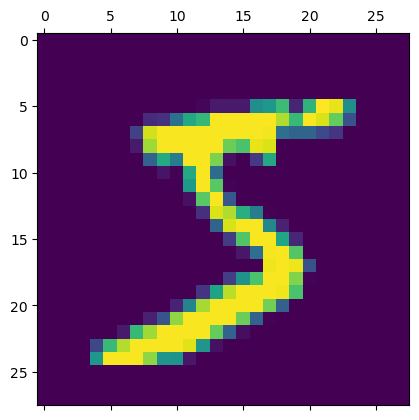

In [91]:
plt.matshow(X_train[0])

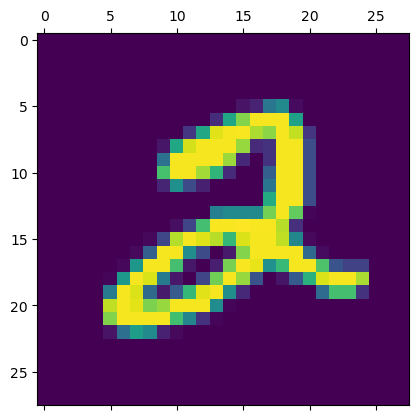

In [92]:
plt.matshow(X_train[5])

In [93]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [94]:
len(y_train)

60000

In [95]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [96]:
X_train_flattened.shape

(60000, 784)

In [97]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [98]:
model = keras.Sequential([keras.layers.Dense(10 ,input_shape=(784,),activation ='sigmoid')])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.8089 - loss: 0.7260
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.9122 - loss: 0.3127
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.9197 - loss: 0.2882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.9226 - loss: 0.2751
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.9238 - loss: 0.2714


In [99]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9165 - loss: 0.3021


[0.26621347665786743, 0.9265000224113464]

In [100]:
y_predict = model.predict(X_test_flattened)
y_predict[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


array([4.9488312e-01, 3.2550567e-03, 9.9961829e-01, 2.6589105e-01,
       4.7366994e-10, 7.1187449e-01, 7.8039467e-01, 6.2217771e-13,
       6.3205160e-02, 1.4642527e-09], dtype=float32)

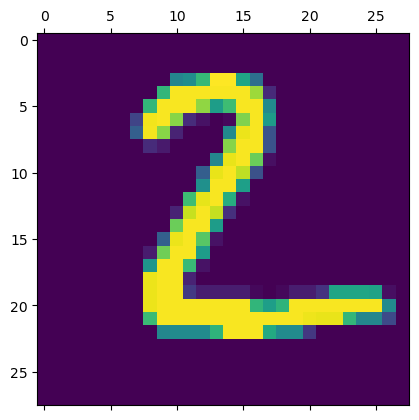

In [101]:
plt.matshow(X_test[1])

In [102]:
np.argmax(y_predict[1])

2

In [103]:
y_pred_labels = [np.argmax(i) for i in y_predict]
y_pred_labels[:5] 

[7, 2, 1, 0, 4]

In [104]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)